# 속성 데이터 2진 분류 Template

# 데이터 준비

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
!wget https://raw.githubusercontent.com/medicieducation/trainingcourse/master/bigdata/deeplearning/material/deep_learning/data/sonar.csv

--2022-07-07 03:57:34--  https://raw.githubusercontent.com/medicieducation/trainingcourse/master/bigdata/deeplearning/material/deep_learning/data/sonar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [text/plain]
Saving to: ‘sonar.csv’

sonar.csv           100%[===================>]  85.72K  --.-KB/s    in 0.005s  

2022-07-07 03:57:34 (18.5 MB/s) - ‘sonar.csv’ saved [87776/87776]



In [10]:
raw_data = pd.read_csv("sonar.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:60]
y = data[:,60]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [11]:
print(train_x[:1])
print(train_y[:5])

[[0.0264 0.0071 0.0342 0.0793 0.1043 0.0783 0.1417 0.1176 0.0453 0.0945
  0.1132 0.084  0.0717 0.1968 0.2633 0.4191 0.505  0.6711 0.7922 0.8381
  0.8759 0.9422 1.     0.9931 0.9575 0.8647 0.7215 0.5801 0.4964 0.4886
  0.4079 0.2443 0.1768 0.2472 0.3518 0.3762 0.2909 0.2311 0.3168 0.3554
  0.3741 0.4443 0.3261 0.1963 0.0864 0.1688 0.1991 0.1217 0.0628 0.0323
  0.0253 0.0214 0.0262 0.0177 0.0037 0.0068 0.0121 0.0077 0.0078 0.0066]]
[1. 0. 0. 0. 0.]


In [12]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(165, 60)
(165,)
(42, 60)
(42,)


# Template

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                610       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


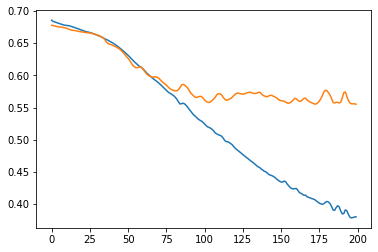

2/2 [==============================] - 0s 9ms/step - loss: 0.3342 - acc: 0.7619 - auc: 0.9336 - precision: 0.7600 - recall: 0.8261
loss= 0.3341512084007263
acc= 0.761904776096344
auc= 0.9336385130882263
precision= 0.7599999904632568
recall= 0.8260869383811951


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


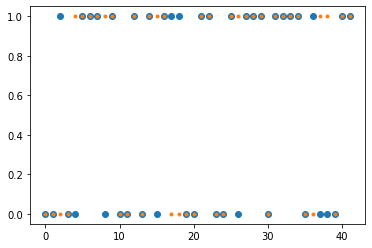

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC, Precision, Recall

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(60,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc", "AUC", Precision(), Recall()])
model.summary()

history = model.fit(train_x, train_y, epochs=200, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc, auc, precision, recall = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
print("auc=", auc)
print("precision=", precision)
print("recall=", recall)




y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int).squeeze()

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()